<a href="https://colab.research.google.com/github/IoannisGeorgiou1/LESSON10-WORCLOUDS/blob/main/Homework_Lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Για να φτιάξουμε wordclouds από κείμενα άρθρων χρειαζόμαστε τις παρακάτω βιβλιοθήκες, τις οποίες εισάγουμε όλες μαζί στην αρχή.

Εάν έχουμε ελληνικά κείμενα:
- βγάζουμε το # από την αρχή της παρακάτω εντολής (κάνουμε δλδ uncomment) και τρέχουμε το κελί
- όταν τελειώσει:
1. ξαναβάζουμε το # (κάνουμε comment)
2. Runtime -> Restart session and run all (ανανεώνουμε το session για να ξέρει ότι τώρα έχουμε και το λεξικό της βιβλιοθήκης spacy)

In [1]:
#!python -m spacy download el_core_news_sm

### ΕΙΣΑΓΩΓΗ ΒΙΒΛΙΟΘΗΚΩΝ

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# εάν έχουμε αγγλικά κείμενα
from wordcloud import WordCloud, STOPWORDS

# εάν έχουμε ελληνικά κείμενα
import spacy

In [20]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ΔΗΜΙΟΥΡΓΙΑ DATAFRAME

Αρχικά, φέρνουμε τα δεδομένα μας (αρχεία xlsx ή csv) και τα ανεβάζουμε στο drive μας.

Στη συνέχεια, εισάγουμε τα δεδομένα μας στην python (φτιάχνουμε dataframes).

Στην αριστερή μπάρα στο colab:
- πατάτε το εικονίδιο του φακέλου (τελευταίο εικονίδιο)
- πατάτε το εικονίδιο του φακέλου με το σήμα του google drive και συνδέεστε στο drive σας
- AN TO KANETE ΓΙΑ ΠΡΩΤΗ ΦΟΡΑ στον υπολογιστή σας, θα σας πει να τρέξετε ένα κελί που δημιουργεί για να συνδεθείτε στο drive σας - Μόλις το τρέξετε θα σας ανοίξει ένα παράθυρο για να αποδεχθείτε τη σύνδεση
- πατάτε το φάκελο του drive και του MyDrive
- ΑΝ ΔΕΝ ΥΠΑΡΧΕΙ ο φάκελος του Drive, κάνετε Refresh το tab στον browser και θα εμφανιστεί
- πατάτε στο φάκελο που έχετε ανεβάσει το xlsx της efsyn
- εντοπίζετε το xslx, βάζετε πάνω του το πονίκι και πατάτε στις 3 τελίτσες που εμφανίζονται δεξιά του ονόματος του αρχείου
- πατάτε copy path στο μενού που εμφανίζεται

Σε ένα νέο κελί γράφετε:

```
df = pd.read_excel(<κάνετε paste το path που κάνατε copy στο τελευταίο παραπάνω βήμα, μέσα σε εισαγωγικά>)
```

In [35]:
import pandas as pd

# δημιουργία dataframe από το αρχείο των δεδομένων μα
SKAIdf = pd.read_csv("/content/drive/MyDrive/skai.gr-MAY23.csv")


In [36]:
SKAIdf = pd.read_csv("/content/drive/MyDrive/skai.gr-MAY23.csv")

In [37]:
SKAIdf

,site,url,date,section,title,author,text
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
1,skai.gr,https://www.skai.gr/news/world/meksiko-18-tour...,2023-05-01,Κόσμος,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,ΑΠΕ-ΜΠΕ,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
2,skai.gr,https://www.skai.gr/news/greece/eortologio-poi...,2023-05-01,Ελλάδα,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά",skai.gr,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της..."
3,skai.gr,https://www.skai.gr/news/world/soudan-i-vretan...,2023-05-01,Κόσμος,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,ΑΠΕ-ΜΠΕ,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...
4,skai.gr,https://www.skai.gr/news/greece/fotia-ta-ksime...,2023-05-01,Ελλάδα,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,skai.gr,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...
...,...,...,...,...,...,...,...
5161,skai.gr,https://www.skai.gr/news/politics/androulakis-...,2023-05-31,Πολιτική,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,ΑΠΕ-ΜΠΕ,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε..."
5162,skai.gr,https://www.skai.gr/news/sports/apotheosi-vero...,2023-05-31,Αθλητικά,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,skai.gr,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...
5163,skai.gr,https://www.skai.gr/news/world/san-simera-i-la...,2023-05-31,Κόσμος,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,skai.gr,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...
5164,skai.gr,https://www.skai.gr/news/world/germania-epithy...,2023-05-31,Κόσμος,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,ΑΠΕ-ΜΠΕ,Το Κυπριακό και οι ελληνοτουρκικές σχέσεις συμ...


### MISSING VALUES

Επειδή τα δεδομένα μας είναι πιθανό να έχουν ελλείπουσες τιμές (missing values), δηλαδή μπορεί να μην υπάρχει μια ημερομηνία σε ένα άρθρο ή ένας τίτλος ή οτιδήποτε, για να μην μας χτυπάει ο κώδικας παρακάτω, πετάμε απ' την αρχή όσα rows έχουν κενές τιμές (nan), με την παρακάτω εντολή:
```
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
df.dropna(inplace=True)
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
df = df.reset_index(drop=True)
```
Εννοείται ότι στη θέση του df βάζουμε το όνομα που δώσαμε στο dataframe μας.

In [38]:
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
SKAIdf.dropna(inplace=True)

In [39]:
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
SKAIdf = df.reset_index(drop=True)

In [40]:
SKAIdf

,site,url,date,section,title,author,text
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
1,skai.gr,https://www.skai.gr/news/world/meksiko-18-tour...,2023-05-01,Κόσμος,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,ΑΠΕ-ΜΠΕ,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
2,skai.gr,https://www.skai.gr/news/greece/eortologio-poi...,2023-05-01,Ελλάδα,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά",skai.gr,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της..."
3,skai.gr,https://www.skai.gr/news/world/soudan-i-vretan...,2023-05-01,Κόσμος,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,ΑΠΕ-ΜΠΕ,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...
4,skai.gr,https://www.skai.gr/news/greece/fotia-ta-ksime...,2023-05-01,Ελλάδα,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,skai.gr,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...
...,...,...,...,...,...,...,...
5161,skai.gr,https://www.skai.gr/news/politics/androulakis-...,2023-05-31,Πολιτική,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,ΑΠΕ-ΜΠΕ,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε..."
5162,skai.gr,https://www.skai.gr/news/sports/apotheosi-vero...,2023-05-31,Αθλητικά,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,skai.gr,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...
5163,skai.gr,https://www.skai.gr/news/world/san-simera-i-la...,2023-05-31,Κόσμος,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,skai.gr,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...
5164,skai.gr,https://www.skai.gr/news/world/germania-epithy...,2023-05-31,Κόσμος,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,ΑΠΕ-ΜΠΕ,Το Κυπριακό και οι ελληνοτουρκικές σχέσεις συμ...


### ΕΠΙΣΚΟΠΗΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Εξετάζουμε το dataframe για να κατανοήσουμε τι περιέχουν τα δεδομένα μας, με εργαλεία που έχουμε μάθει όπως, τα head(), shape, describe(), columns, unique() κλπ.

In [41]:
SKAIdf.head()

,site,url,date,section,title,author,text
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
1,skai.gr,https://www.skai.gr/news/world/meksiko-18-tour...,2023-05-01,Κόσμος,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,ΑΠΕ-ΜΠΕ,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
2,skai.gr,https://www.skai.gr/news/greece/eortologio-poi...,2023-05-01,Ελλάδα,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά",skai.gr,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της..."
3,skai.gr,https://www.skai.gr/news/world/soudan-i-vretan...,2023-05-01,Κόσμος,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,ΑΠΕ-ΜΠΕ,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...
4,skai.gr,https://www.skai.gr/news/greece/fotia-ta-ksime...,2023-05-01,Ελλάδα,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,skai.gr,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...


In [42]:
SKAIdf.tail()

,site,url,date,section,title,author,text
5161,skai.gr,https://www.skai.gr/news/politics/androulakis-...,2023-05-31,Πολιτική,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,ΑΠΕ-ΜΠΕ,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε..."
5162,skai.gr,https://www.skai.gr/news/sports/apotheosi-vero...,2023-05-31,Αθλητικά,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,skai.gr,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...
5163,skai.gr,https://www.skai.gr/news/world/san-simera-i-la...,2023-05-31,Κόσμος,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,skai.gr,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...
5164,skai.gr,https://www.skai.gr/news/world/germania-epithy...,2023-05-31,Κόσμος,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,ΑΠΕ-ΜΠΕ,Το Κυπριακό και οι ελληνοτουρκικές σχέσεις συμ...
5165,skai.gr,https://www.skai.gr/news/politics/paylos-marin...,2023-05-31,Πολιτική,Παύλος Μαρινάκης: Για ποιον λόγο αποσύρθηκε το...,skai.gr,«Μετά από τις κωμικοτραγικές αντιφάσεις των στ...


In [45]:
SKAIdf.shape

(5166, 7)

In [46]:
SKAIdf.describe()

,site,url,date,section,title,author,text
count,5166,5166,5166,5166,5166,4983,5166
unique,1,5166,31,20,5137,197,5166
top,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-31,Κόσμος,Τι θα κάνετε σήμερα: Προτάσεις για θέατρο και ...,skai.gr,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
freq,5166,1,363,1568,13,2379,1


In [50]:
SKAIdf.columns

Index(['site', 'url', 'date', 'section', 'title', 'author', 'text'], dtype='object')

In [52]:
SKAIdf.dtypes

site       object
url        object
date       object
section    object
title      object
author     object
text       object
dtype: object

### ΣΥΝΕΝΩΣΗ ΣΤΗΛΩΝ ΚΕΙΜΕΝΩΝ

Αν θέλουμε να ενώσουμε κείμενα από δυο ή περισσότερες στήλες και να τα σώσουμε σε μια νέα στήλη, (π.χ. τον τίτλο με το κείμενο του άρθρου), μπορούμε να το κάνουμε ή με απλή πρόσθεση των επιθυμητών στηλών και πρόσθεση κενού ανάμεσά τους:

```
df["full_text"] = df["title"] + " " + df["body_text"]
```
ή με το aggregate

```
df['full_text'] = df[['title', 'body_text']].agg(' '.join, axis=1)
```

In [55]:
SKAIdf

,site,url,date,section,title,author,text
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
1,skai.gr,https://www.skai.gr/news/world/meksiko-18-tour...,2023-05-01,Κόσμος,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,ΑΠΕ-ΜΠΕ,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
2,skai.gr,https://www.skai.gr/news/greece/eortologio-poi...,2023-05-01,Ελλάδα,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά",skai.gr,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της..."
3,skai.gr,https://www.skai.gr/news/world/soudan-i-vretan...,2023-05-01,Κόσμος,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,ΑΠΕ-ΜΠΕ,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...
4,skai.gr,https://www.skai.gr/news/greece/fotia-ta-ksime...,2023-05-01,Ελλάδα,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,skai.gr,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...
...,...,...,...,...,...,...,...
5161,skai.gr,https://www.skai.gr/news/politics/androulakis-...,2023-05-31,Πολιτική,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,ΑΠΕ-ΜΠΕ,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε..."
5162,skai.gr,https://www.skai.gr/news/sports/apotheosi-vero...,2023-05-31,Αθλητικά,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,skai.gr,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...
5163,skai.gr,https://www.skai.gr/news/world/san-simera-i-la...,2023-05-31,Κόσμος,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,skai.gr,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...
5164,skai.gr,https://www.skai.gr/news/world/germania-epithy...,2023-05-31,Κόσμος,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,ΑΠΕ-ΜΠΕ,Το Κυπριακό και οι ελληνοτουρκικές σχέσεις συμ...


In [60]:
SKAIdf['text'] = SKAIdf[['title', 'text']].agg('. '.join, axis=1)
SKAIdf.loc[0, 'text']

'Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή για την Ουκρανία -Τι δήλωσε ο Πάπας Φραγκίσκος. Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποστολή σε μια προσπάθεια να τερματιστεί ο πόλεμος μεταξύ Ρωσίας και Ουκρανίας, δήλωσε χθες Κυριακή ο Πάπας Φραγκίσκος, αρνούμενος ωστόσο να δώσει περισσότερες λεπτομέρειες. «Είμαι πρόθυμος να κάνω ό,τι πρέπει να γίνει. Υπάρχει μια αποστολή που βρίσκεται τώρα σε πορεία, αλλά αυτή η αποστολή δεν είναι ακόμη δημόσια. Όταν γίνει δημόσια, θα την αποκαλύψω», είπε ο πάπας μιλώντας σε δημοσιογράφους στο αεροπλάνο κατά την επιστροφή του στο Βατικανό μετά από μια τριήμερη επίσκεψη που πραγματοποίησε στην Ουγγαρία. «Νομίζω ότι η ειρήνη επιτυγχάνεται πάντα με το να ανοίγεις διαύλους. Δεν μπορείς ποτέ να επιτύχεις ειρήνη μέσω αποκλεισμών... Αυτό δεν είναι εύκολο», τόνισε. Ο ποντίφικας πρόσθεσε ότι συνομίλησε για την κατάσταση στην Ουκρανία με τον Ούγγρο πρωθυπουργό Βίκτορ Όρμπαν και με τον Μητροπολίτη Ιλαρίωνα, εκπρόσωπο της Ρωσικής Ορθόδοξης Εκκλησίας στη Βουδ

### DATETIME

Για να μπορούμε να κάνουμε αναλύσεις βάσει του χρόνου, μετατρέπουμε τις ημερομηνίες από string σε datetime, με την εντολή:

```
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
```
Στο παραπάνω παράδειγμα, η νέα στήλη που φτιάχνουμε θα λέγεται 'datetime', η υπάρχουσα στήλη των ημερομηνιών στο df μας λέγεται 'date' και η μορφή των ημερομηνιών που περιέχει είναι: ΕΤΟΣ-ΜΗΝΑΣ-ΗΜΕΡΑ ΩΡΑ:ΛΕΠΤΑ (π.χ. 2024-06-05 13:41)

H μορφή των ημερομηνιών στη στήλη 'date', καθορίζει το format='', που θα βάλουμε μέσα στην παρέμθεση στην εντολή μας. Κάθε site ή εφαρμογή επιλέγει τον τρόπο παρουσίασης των ημερομηνιών που του αρέσει (π.χ. κάποιος βάζει τις ημερομηνίες στη μορφή: 5 Ιουνίου 2024)

Τους κωδικούς για το format θα τους βρείτε εδώ: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [65]:
# Μετατροπή της στήλης των ημερομηνιών σε datetime
SKAIdf['datetime'] = pd.to_datetime(SKAIdf['date'], format='%Y-%m-%d')

In [66]:
SKAIdf

,site,url,date,section,title,author,text,datetime
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,2023-05-01
1,skai.gr,https://www.skai.gr/news/world/meksiko-18-tour...,2023-05-01,Κόσμος,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,ΑΠΕ-ΜΠΕ,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,2023-05-01
2,skai.gr,https://www.skai.gr/news/greece/eortologio-poi...,2023-05-01,Ελλάδα,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά",skai.gr,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά. Του Προφή...",2023-05-01
3,skai.gr,https://www.skai.gr/news/world/soudan-i-vretan...,2023-05-01,Κόσμος,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,ΑΠΕ-ΜΠΕ,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,2023-05-01
4,skai.gr,https://www.skai.gr/news/greece/fotia-ta-ksime...,2023-05-01,Ελλάδα,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,skai.gr,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,2023-05-01
...,...,...,...,...,...,...,...,...
5161,skai.gr,https://www.skai.gr/news/politics/androulakis-...,2023-05-31,Πολιτική,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,ΑΠΕ-ΜΠΕ,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,2023-05-31
5162,skai.gr,https://www.skai.gr/news/sports/apotheosi-vero...,2023-05-31,Αθλητικά,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,skai.gr,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,2023-05-31
5163,skai.gr,https://www.skai.gr/news/world/san-simera-i-la...,2023-05-31,Κόσμος,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,skai.gr,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,2023-05-31
5164,skai.gr,https://www.skai.gr/news/world/germania-epithy...,2023-05-31,Κόσμος,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,ΑΠΕ-ΜΠΕ,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,2023-05-31


Αφού μετατρέψουμε τις ημερομηνίες σε datetime, τώρα μπορούμε να φτιάξουμε στήλες με τα έτη, τους μήνες, τις μέρες κλπ.

```
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
```

In [74]:
# στήλη έτους
SKAIdf['year'] = pd.DatetimeIndex(SKAIdf['datetime']).year

# στήλη μήνα
SKAIdf['month'] = pd.DatetimeIndex(SKAIdf['datetime']).month
# κλπ.
SKAIdf['day'] = pd.DatetimeIndex(SKAIdf['datetime']).day
SKAIdf['hour'] = pd.DatetimeIndex(SKAIdf['datetime']).hour

In [75]:
SKAIdf

,site,url,date,section,title,author,text,datetime,year,month,day,hour
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,2023-05-01,2023,5,1,0
1,skai.gr,https://www.skai.gr/news/world/meksiko-18-tour...,2023-05-01,Κόσμος,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,ΑΠΕ-ΜΠΕ,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,2023-05-01,2023,5,1,0
2,skai.gr,https://www.skai.gr/news/greece/eortologio-poi...,2023-05-01,Ελλάδα,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά",skai.gr,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά. Του Προφή...",2023-05-01,2023,5,1,0
3,skai.gr,https://www.skai.gr/news/world/soudan-i-vretan...,2023-05-01,Κόσμος,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,ΑΠΕ-ΜΠΕ,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,2023-05-01,2023,5,1,0
4,skai.gr,https://www.skai.gr/news/greece/fotia-ta-ksime...,2023-05-01,Ελλάδα,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,skai.gr,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,2023-05-01,2023,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5161,skai.gr,https://www.skai.gr/news/politics/androulakis-...,2023-05-31,Πολιτική,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,ΑΠΕ-ΜΠΕ,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,2023-05-31,2023,5,31,0
5162,skai.gr,https://www.skai.gr/news/sports/apotheosi-vero...,2023-05-31,Αθλητικά,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,skai.gr,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,2023-05-31,2023,5,31,0
5163,skai.gr,https://www.skai.gr/news/world/san-simera-i-la...,2023-05-31,Κόσμος,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,skai.gr,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,2023-05-31,2023,5,31,0
5164,skai.gr,https://www.skai.gr/news/world/germania-epithy...,2023-05-31,Κόσμος,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,ΑΠΕ-ΜΠΕ,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,2023-05-31,2023,5,31,0


### ΓΡΑΦΗΜΑΤΑ ΠΕΡΙΓΡΑΦΙΚΗΣ ΑΝΑΛΥΣΗΣ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Με τις τεχνικές φιλτραρίσματος, σορταρίσματος και γκρουπαρίσματος που έχουμε μάθει, μπορούμε να φτιάξουμε γραφήματα που να απαντούν ερωτήματα όπως:

- ποιο είναι το πλήθος της αρθρογραφίας ανά ώρα;
- ποιο είναι το πλήθος της αρθρογραφίας ανά θεματική κατηγορία; ανά συντάκτη;
- πώς μεταβάλεται το πλήθος της αρθρογραφίας από μέρα σε μέρα; συνολικά και ανά κατηγορία;
- ποιοι είναι οι πολυγραφέστεροι συντάκτες;

<Axes: xlabel='section'>

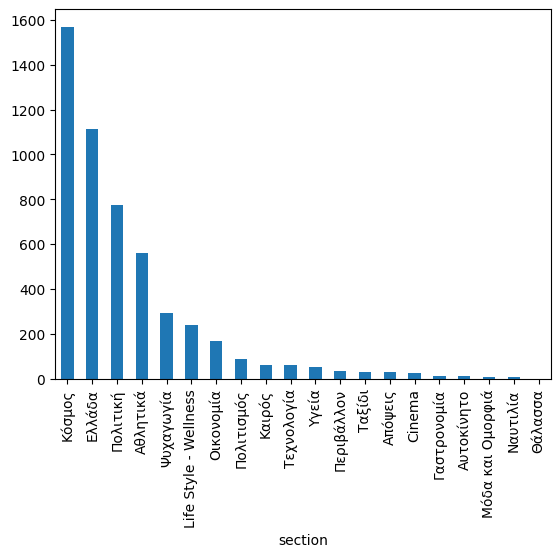

In [79]:
SKAIdf['section'].value_counts().plot(kind='bar')

In [86]:
 SKAIdf['author'].value_counts().head(10)

author
skai.gr          2379
ΑΠΕ-ΜΠΕ          1584
sport-fm.gr       412
Savoir Ville       44
thestival.gr       31
ertnews.gr         27
thebest            23
onlarissa.gr       17
paopantou.gr       15
Cretalive.gr       14
Name: count, dtype: int64

<Axes: xlabel='author'>

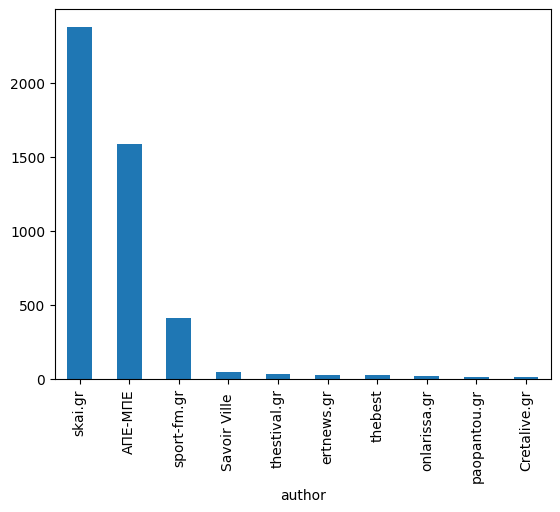

In [90]:
 SKAIdf['author'].value_counts().head(10).plot(kind='bar')

## Wordclouds

Τα wordclouds είναι ένα γράφημα που μας επιτρέπει να σχηματίσουμε μια γρήγορη άποψη για τη θεματολογία ενός κειμένου ή ενός σώματος κειμένων.

Μπορούμε να φτιάξουμε wordclouds για το σύνολο των κειμένων μας, αλλά μπορεί να είναι χρησιμότερο να το χρησιμοποιήσουμε σε στοχευμένα κείμενα.

Π.χ.: ας υποθέσουμε ότι από τα προηγούμενα γραφήματα είδαμε ότι το πλήθος της αρθρογραφίας μια συγκεκριμένη μέρα (ή σε ένα γκρουπ ημερών) είναι πολύ μεγαλύτερο από το μέσο όρο του πλήθους των άρθρων ανά ημέρα. Και πιο συγκεκριμένα, είναι μεγαλύτερο στην κατηγορία αθλητικά.

Αν φτιάξουμε ένα wordcloud μόνο για τα άρθρα της συγκεκριμένης κατηγορίας, της συγκεκριμένης ημέρας, θα βρούμε γρήγορα τις λέξεις που αφορούν το σημαντικό αθλητικό γεγονός εκείνης της ημέρας.

#### ΠΑΡΑΔΕΙΓΜΑ WORDCLOUD ME KEIMENO ΚΑΤΕΥΘΕΙΑΝ AΠΟ TH ΣΤΗΛΗ ΚΕΙΜΕΝΟΥ ΤΟΥ DATAFRAME

**!!!ΠΡΟΣΟΧΗ!!!** Eπειδή το dataframe φτιάχνεται από αρχείο που είναι στο drive μου, μην κάνετε uncomment και τρέξετε τα παρακάτω κελιά γιατί θα εξαφανιστούν τα outputs.

In [9]:
# df = pd.read_excel("/content/drive/MyDrive/2023/teaching python/Lesson 9/efsyn_full_articles_ekloges_2023_7_5_2023.xlsx")
# df.tail()

In [10]:
# df.dropna(inplace=True)
# df = df.reset_index(drop=True)

In [11]:
# df['text'] = df[['title', 'full_text']].agg(' '.join, axis=1)

In [12]:
# df[['date', "section"]].describe()

In [13]:
# df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
# df['day'] = pd.DatetimeIndex(df['datetime']).day

In [14]:
# df[df["section"]=="ΠΟΛΙΤΙΚΗ"].groupby("day", as_index=False)['title'].count().sort_values("title", ascending=False)

Βλέπω ότι τα περισσότερα άρθρα στην κατηγορία ΠΟΛΙΤΙΚΗ ήταν στις 6 Ιουνίου (τα δεδομένα μου είναι από 30/5 - 6/6 του 2023). Φιλτράρω το dataframe μου.

In [15]:
# df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]

Ακριβώς αυτό το φίλτρο μπορώ να το βάλω στην παράμετρο του generate() στο wordcloud

In [16]:
# wordcloud = WordCloud(
#     stopwords = nlp.Defaults.stop_words,
#     width = 2000,
#     height = 1000,
#     background_color = 'black'
#  ).generate(' '.join(df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]))
# fig = plt.figure(
#     figsize = (10, 8),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Κι αν θέλω να κάνω και lemmatization για να φύγουν οι διαφορετικές πτώσεις των ίδιων λέξεων:

In [17]:
# wordcloud = WordCloud(
#     stopwords = nlp.Defaults.stop_words,
#     width = 2000,
#     height = 1000,
#     background_color = 'black'
#  ).generate(' '.join(token.lemma_ for token in nlp(' '.join(df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]))))
# fig = plt.figure(
#     figsize = (10, 8),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Για όποιον θα ήθελε να παίξει με την εμφάνιση του wordcloud: https://amueller.github.io/word_cloud/auto_examples/index.html

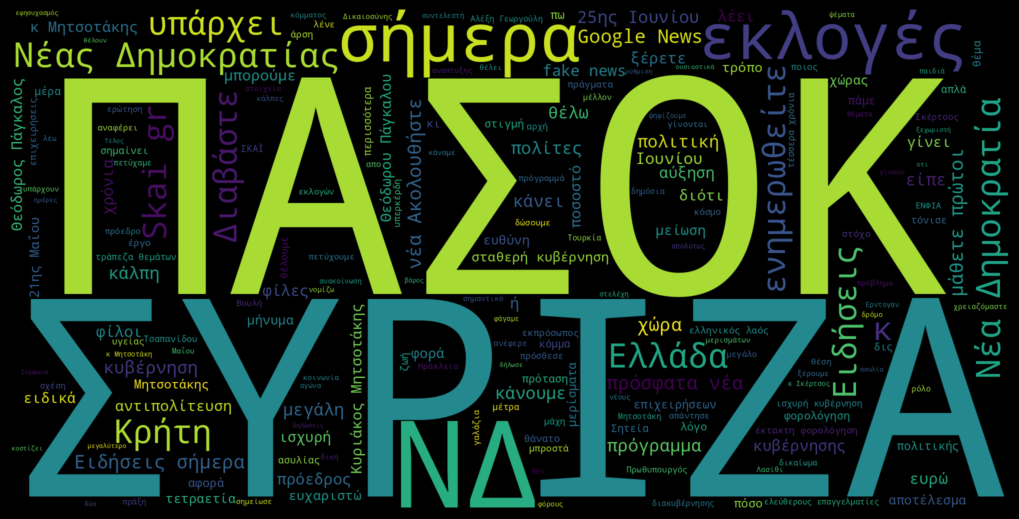

In [94]:
 wordcloud = WordCloud(
     stopwords = nlp.Defaults.stop_words,
     width = 2000,
     height = 1000,
     background_color = 'black'
  ).generate(' '.join(SKAIdf[(SKAIdf["section"]=="Πολιτική") & (SKAIdf["day"]==31)]["text"]))
 fig = plt.figure(
     figsize = (10, 8),
     facecolor = 'k',
     edgecolor = 'k')
 plt.imshow(wordcloud, interpolation = 'bilinear')
 plt.axis('off')
 plt.tight_layout(pad=0)
 plt.show()

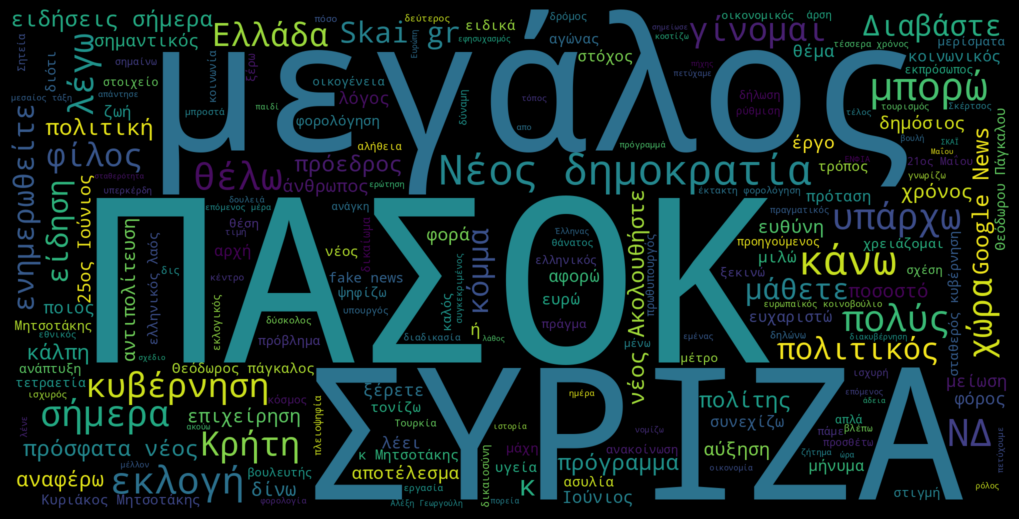

In [108]:
  wordcloud = WordCloud(
     stopwords = nlp.Defaults.stop_words,
    width = 2000,
     height = 1000,
     background_color = 'black'
  ).generate(' '.join(token.lemma_ for token in nlp(' '.join(SKAIdf[(SKAIdf["section"]=="Πολιτική") & (SKAIdf["day"]==31)]["text"]))))
  fig = plt.figure(
     figsize = (10, 8),
     facecolor = 'k',
     edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

## ΣΥΜΠΕΡΑΣΜΑΤΑ

Τέλος, γράψτε ένα σύντομο κείμενο για τα ευρήματα των αναλύσεών σας.